Company X has recently obtained 3 datasets on coin flipping experiments (1: head, 0: tail). For each dataset, the manager wants to know the probability of getting a head if we flip this coin one more time. He asked 5 data scientists A-E and they all used Bernoulli distribution to model a single coin toss. However, four people analyzed the data differently (A is a frequentist, B-E are Bayesian). 

- 5 data scientists
    - A used maximum likelihood
    - B used a uniform prior Beta(a=1, b=1)
    - C used a broad prior Beta(a=2, b=2) as shown in Fig. 2.3
    - D used a biased prior Beta(a=2, b=5)
    - E used a narrow prior Beta(a=200, b=200)

- 3 data sets
    - dataset X = [1] (just a single trial with a head)
    - dataset Y = [1, 1, 1] (three heads in a row)
    - dataset Z = 100 trials with 80 tails

For each dataset, 
(1) Plot the posterior distribution over the parameter mu.
(2) Calculate the probability of getting a head in the next trial. 

You can use any Python package as well as all the equations in the textbook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, binom
from scipy.special import comb

In [2]:
X = np.array([1])
Y=  np.array([1, 1, 1])
Z = np.array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
             1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
             0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [3]:
mu = np.linspace(0, 1, 100)

# Data scientist A: maximum likelihood

## Data set X

Using (2.8) $\mu_{ML} = 1$

Using (2.1) $p(x=1|\mu_{ML}) = 1$

Thus, data scientist A predicts that the next coin toss will be heads with p=1 just from a single observation of a head. This demonstrates how maximum likelihood estimation can severely **over-fit** when the number of observation is small. This motivates the use of a Bayesian analysis that uses a prior distribution.

## Data set Y

Using (2.8) $\mu_{ML} = 3/3 = 1$

Using (2.1) $p(x=1|\mu_{ML}) = 1$

Because all the three tosses are heads, data scientist A predicts that the next coin toss will be heads with p=1 again showing **over-fitting**.

## Data set Z 

In [4]:
mu_ML = Z.sum() / len(Z)
mu_ML

0.8

Using (2.8) $\mu_{ML} = 0.8$

Using (2.1) $p(x=1|\mu_{ML}) = p(x=1|0.8) = 0.8$

Once we have a lot of data, the tendency for maximum likelihood to over-fit is reduced.

## Defining useful functions for performing Bayesian analysis

In [5]:
def calculate_posterior(m, l, a, b):
    """perform Bayesian update of beta-binomial model
    
    Args:
        m: observed number of heads
        l: observed number of tails 
        a: effective number of heads in the prior
        b: effective number of tails in the prior
    
    Returns:
        posterior distribution
    """
    return beta(m + a, l + b)

In [6]:
def predict(m, l, a, b):
    """calculates the probability of obtaining head
    
    Args:
        m: observed number of heads
        l: observed number of tails 
        a: effective number of heads in the prior
        b: effective number of tails in the prior
    
    Returns:
        p (float): 
    """
    p = (m + a) / (m + a + l + b)
    print(f'Probability of next trial being head: p = {p:.3f}')
    return p

In [7]:
def plot_prior_posterior(prior, posterior, p):
    MAX = np.max([np.max(prior.pdf(mu)), np.max(posterior.pdf(mu))])
    fig, ax = plt.subplots(1, 2, figsize=(10, 2))
    ax[0].plot(mu, prior.pdf(mu), 'r')
    ax[0].set_xlim(0, 1)
    ax[0].set_ylim(0, MAX * 1.1)
    ax[0].set_xlabel(r'$\mu$', fontsize=12)
    ax[0].set_title('Prior')
    
    ax[1].plot(mu, posterior.pdf(mu), 'r')
    ax[1].plot(p, posterior.pdf(p), 'bo')
    ax[1].set_xlim(0, 1)
    ax[1].set_ylim(0, MAX * 1.1)
    ax[1].set_xlabel(r'$\mu$', fontsize=12)
    ax[1].set_title('Posterior')

# Data scientist B: uniform prior Beta(a=1, b=1)

## Data set X

In [8]:
a = 1
b = 1
prior = beta(a, b)

B will use Baeysian method, but does not have any prior belief on what $\mu$ should be. Thus, B chooses a flat uniform prior.

In [9]:
m = 1
l = 0

In [10]:
posterior = calculate_posterior(m, l, a, b)
p = predict(m, l, a, b)

Probability of next trial being head: p = 0.667


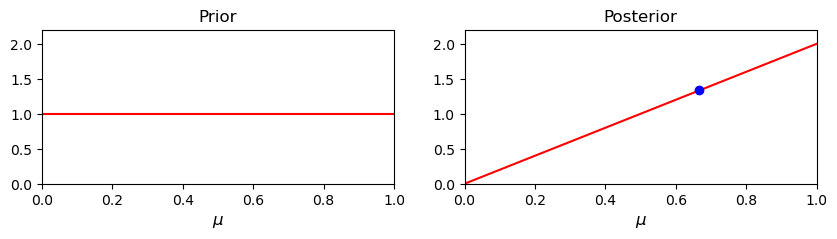

In [11]:
plot_prior_posterior(prior, posterior, p)

After a single head, B's belief is updated, and the posterior has a higher probability for larger $\mu$.

## Data set Y

In [12]:
m = 3
l = 0

In [13]:
posterior = calculate_posterior(m, l, a, b)
p = predict(m, l, a, b)

Probability of next trial being head: p = 0.800


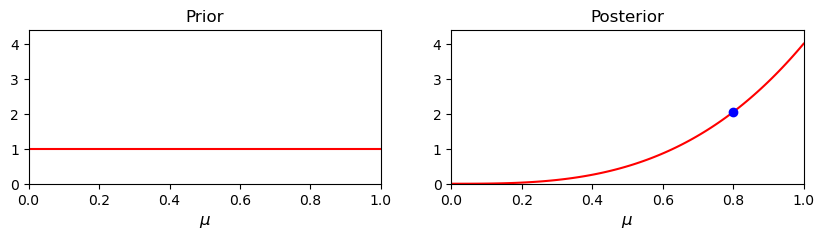

In [14]:
plot_prior_posterior(prior, posterior, p)

With 3 heads observed in a row, B's posterior has even higher values for larger $\mu$.

## Data set Z

In [15]:
m = Z.sum()
l = len(Z) - m
m, l

(80, 20)

In [16]:
posterior = calculate_posterior(m, l, a, b)
p = predict(m, l, a, b)

Probability of next trial being head: p = 0.794


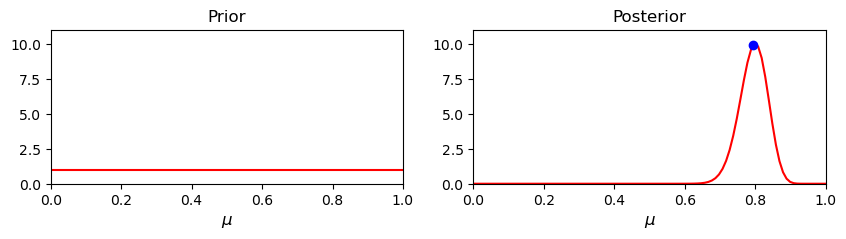

In [17]:
plot_prior_posterior(prior, posterior, p)

With 100 observations, now the posterior is narrow and is peaked around the observed head frequency of p=0.8.

# Data scientist C: broad prior Beta(a=2, b=2)

## Data set X

In [18]:
a = 2
b = 2
prior = beta(a, b)

This describe B's belief that coins tend to be unbiased (p=0.5), but his belief is flexible enough that other possibilities are also taken into account. 

In [19]:
m = 1
l = 0

In [20]:
posterior = calculate_posterior(m, l, a, b)
p = predict(m, l, a, b)

Probability of next trial being head: p = 0.600


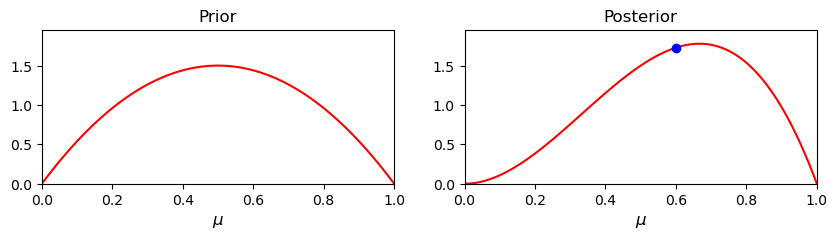

In [21]:
plot_prior_posterior(prior, posterior, p)

After a single head, B's belief is updated, and the posterior over $\mu$ is shifted rightwards. 

## Data set Y

In [22]:
m = 3
l = 0

In [23]:
posterior = calculate_posterior(m, l, a, b)
p = predict(m, l, a, b)

Probability of next trial being head: p = 0.714


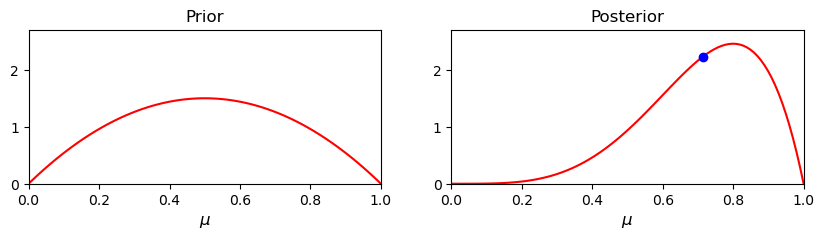

In [24]:
plot_prior_posterior(prior, posterior, p)

With 3 heads observed in a row, B's posterior over $\mu$ is moved even further to the right.

## Data set Z

In [25]:
m = Z.sum()
l = len(Z) - m
m, l

(80, 20)

In [26]:
posterior = calculate_posterior(m, l, a, b)
p = predict(m, l, a, b)

Probability of next trial being head: p = 0.788


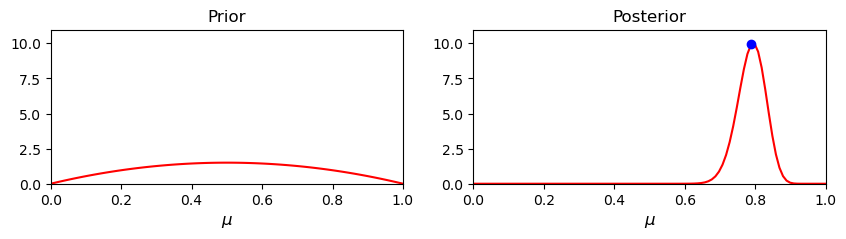

In [27]:
plot_prior_posterior(prior, posterior, p)

With 100 observations, now the posterior is much narrower and is peaked around the observed head frequency of p=0.8.

# Data scientist D: use a biased prior Beta(a=2, b=5)

In [28]:
a = 2
b = 5
prior = beta(a, b)

This describes D's prior belief that this coins is  more likely to result in a tail. 

## Data set X

In [29]:
m = 1
l = 0

In [30]:
posterior = calculate_posterior(m, l, a, b)
p = predict(m, l, a, b)

Probability of next trial being head: p = 0.375


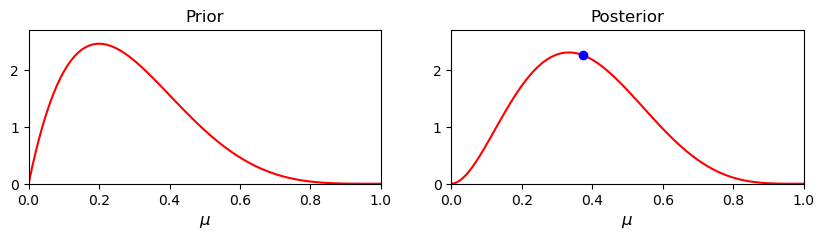

In [31]:
plot_prior_posterior(prior, posterior, p)

With one head, D's posterior over $\mu$ moves slightly rightward, but C's predicts that the next toss is more likely to be tail than head, as C is still influenced by his prior.

## Data set Y

In [32]:
m = 3
l = 0

In [33]:
posterior = calculate_posterior(m, l, a, b)
p = predict(m, l, a, b)

Probability of next trial being head: p = 0.500


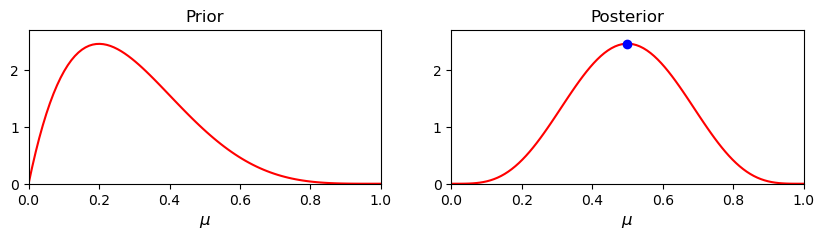

In [34]:
plot_prior_posterior(prior, posterior, p)

With 3 heads in a row, D updates his belief and the posterior over $\mu$ is now centered at p=0.5.

## Data set Z

In [35]:
m = Z.sum()
l = len(Z) - m
m, l

(80, 20)

In [36]:
posterior = calculate_posterior(m, l, a, b)
p = predict(m, l, a, b)

Probability of next trial being head: p = 0.766


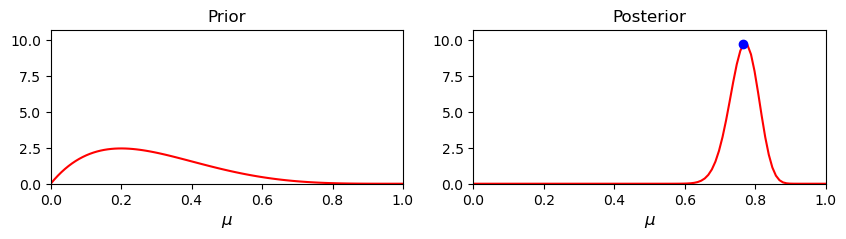

In [37]:
plot_prior_posterior(prior, posterior, p)

With 100 observations, D's initial bias towards tail is mostly gone, and the posterior over $\mu$ is narrow and is peaked near p=0.8, which corresponds to the observed head frequency.

# Data scientist E: use a narrow prior Beta(a=200, b=200)

In [38]:
a = 200
b = 200
prior = beta(a, b)

This prior describe E's strong belief that all coins should be unbiased. 

## Data set X

In [39]:
m = 1
l = 0

In [40]:
posterior = calculate_posterior(m, l, a, b)
p = predict(m, l, a, b)

Probability of next trial being head: p = 0.501


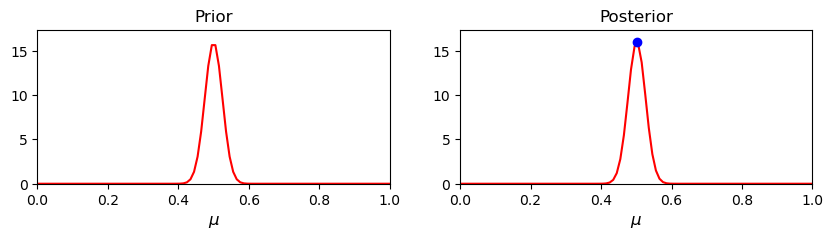

In [41]:
plot_prior_posterior(prior, posterior, p)

A single observation barely changes E's strong belief. 

## Data set Y

In [42]:
m = 3
l = 0

In [43]:
posterior = calculate_posterior(m, l, a, b)
p = predict(m, l, a, b)

Probability of next trial being head: p = 0.504


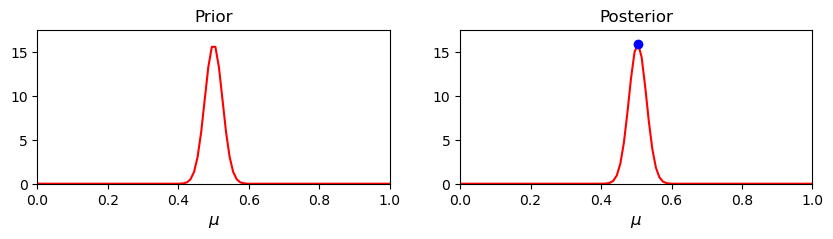

In [44]:
plot_prior_posterior(prior, posterior, p)

With more heads, D's belief is slightly moved towards higher $\mu$.

## Data set Z

In [45]:
m = Z.sum()
l = len(Z) - m
m, l

(80, 20)

In [46]:
posterior = calculate_posterior(m, l, a, b)
p = predict(m, l, a, b)

Probability of next trial being head: p = 0.560


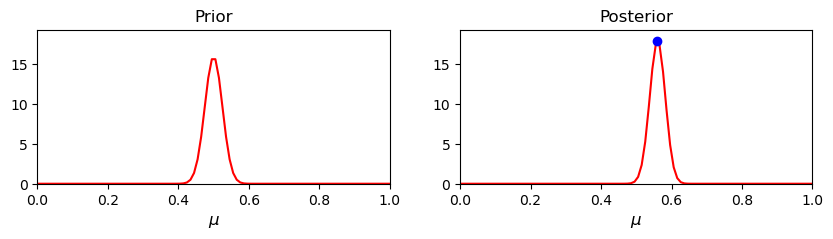

In [47]:
plot_prior_posterior(prior, posterior, p)

With 100 observations, E's belief moved a bit more but he's prediction is only p=0.56 when 80% of the observations are heads. Thus, D is strongly influenced by his own prior belief, and is less influenced by the observations. This shows the potential issue with using a narrow prior distribution. 

# Summary

|Data scientist |prior | X (N=1)  | Y (N=3)  |Z (N=100)|
|-----|----------------|----------|----------|---------|
| A   | ML             |  1.0     | 1.0      |   0.8   |
| B   | Beta(1, 1)     | 0.667    | 0.8      | 0.794   |
| C   | Beta(2, 2)     |  0.6     | 0.714    | 0.788   |
| D   | Beta(2, 5)     | 0.375    | 0.500    | 0.766   |
| E   | Beta(200, 200) | 0.501    | 0.504    | 0.560   |